In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import COLLECTIONS as cln
from IPython.display import clear_output
import html5lib
import datetime as dt
import pickle
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cnx = create_engine('postgresql://%s:%s@localhost:%s/%s' % (cln.username, 
#                                                             cln.password, 
#                                                             cln.port,
#                                                             cln.db_name))

In [3]:
# query = """SELECT "FlightDate", "Carrier", "Origin",
#                    COUNT(*) AS "Num_Flights", 
#                    SUM("ArrDel15") AS "Num_ArrDelays", 
#                    SUM("DepDel15") AS "Num_DepDelays"
#             FROM ontimeperformance
#             GROUP BY "FlightDate", "Carrier", "Origin";"""

In [89]:
df = pd.read_csv('Flight_Delays_Paths.csv', index_col=0)

/home/chrisgiler/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [91]:
df.head()

,FlightDate,Carrier,Origin,Dest,Num_Flights,Num_ArrDelays,Num_DepDelays
0,2016-01-01,AA,ABQ,DFW,4,1.0,1.0
1,2016-01-01,AA,ALB,CLT,3,0.0,0.0
2,2016-01-01,AA,ANC,PHX,1,1.0,0.0
3,2016-01-01,AA,ATL,CLT,7,1.0,1.0
4,2016-01-01,AA,ATL,DFW,7,2.0,3.0


In [96]:
len(df)

3852323

In [92]:
df_origins = df.groupby(by=['FlightDate']).sum()
df_origins['PctArrDelays'] = df_origins.Num_ArrDelays/df_origins.Num_Flights
df_origins['PctDepDelays'] = df_origins.Num_DepDelays/df_origins.Num_Flights
df_origins.head()
# fig, ax = plt.subplots(1, 1, figsize=(30,12))
# df[(df['Origin'] == 'ATL')].plot('FlightDate', 'Num_Flights', ax=ax)
# df[(df['Origin'] == 'ATL')].plot('FlightDate', 'Num_DepDelays', ax=ax)
# df[(df['Origin'] == 'ATL')].plot('FlightDate', 'Num_ArrDelays', ax=ax)

,Num_Flights,Num_ArrDelays,Num_DepDelays,PctArrDelays,PctDepDelays
FlightDate,,,,,
2016-01-01,12954,1667.0,1947.0,0.128686,0.150301
2016-01-02,14796,2291.0,2792.0,0.154839,0.188700
2016-01-03,15757,3612.0,3792.0,0.229231,0.240655
2016-01-04,15470,3231.0,3433.0,0.208856,0.221913
2016-01-05,14337,2838.0,3120.0,0.197949,0.217619


In [93]:
df_cur = df_origins.loc[(slice('2016-01-01', '2016-12-31')), :].reset_index()
df_cur.head()

,FlightDate,Num_Flights,Num_ArrDelays,Num_DepDelays,PctArrDelays,PctDepDelays
0,2016-01-01,12954,1667.0,1947.0,0.128686,0.150301
1,2016-01-02,14796,2291.0,2792.0,0.154839,0.188700
2,2016-01-03,15757,3612.0,3792.0,0.229231,0.240655
3,2016-01-04,15470,3231.0,3433.0,0.208856,0.221913
4,2016-01-05,14337,2838.0,3120.0,0.197949,0.217619


In [94]:
df_cur['FlightDate'] = pd.to_datetime(df_cur['FlightDate'])
df_cur['isweekend'] = df_cur['FlightDate'].apply(lambda x: 1 if x.weekday() >= 5 else 0)
df_cur['weekdaynum'] = df_cur['FlightDate'].apply(lambda x: x.weekday()/6)

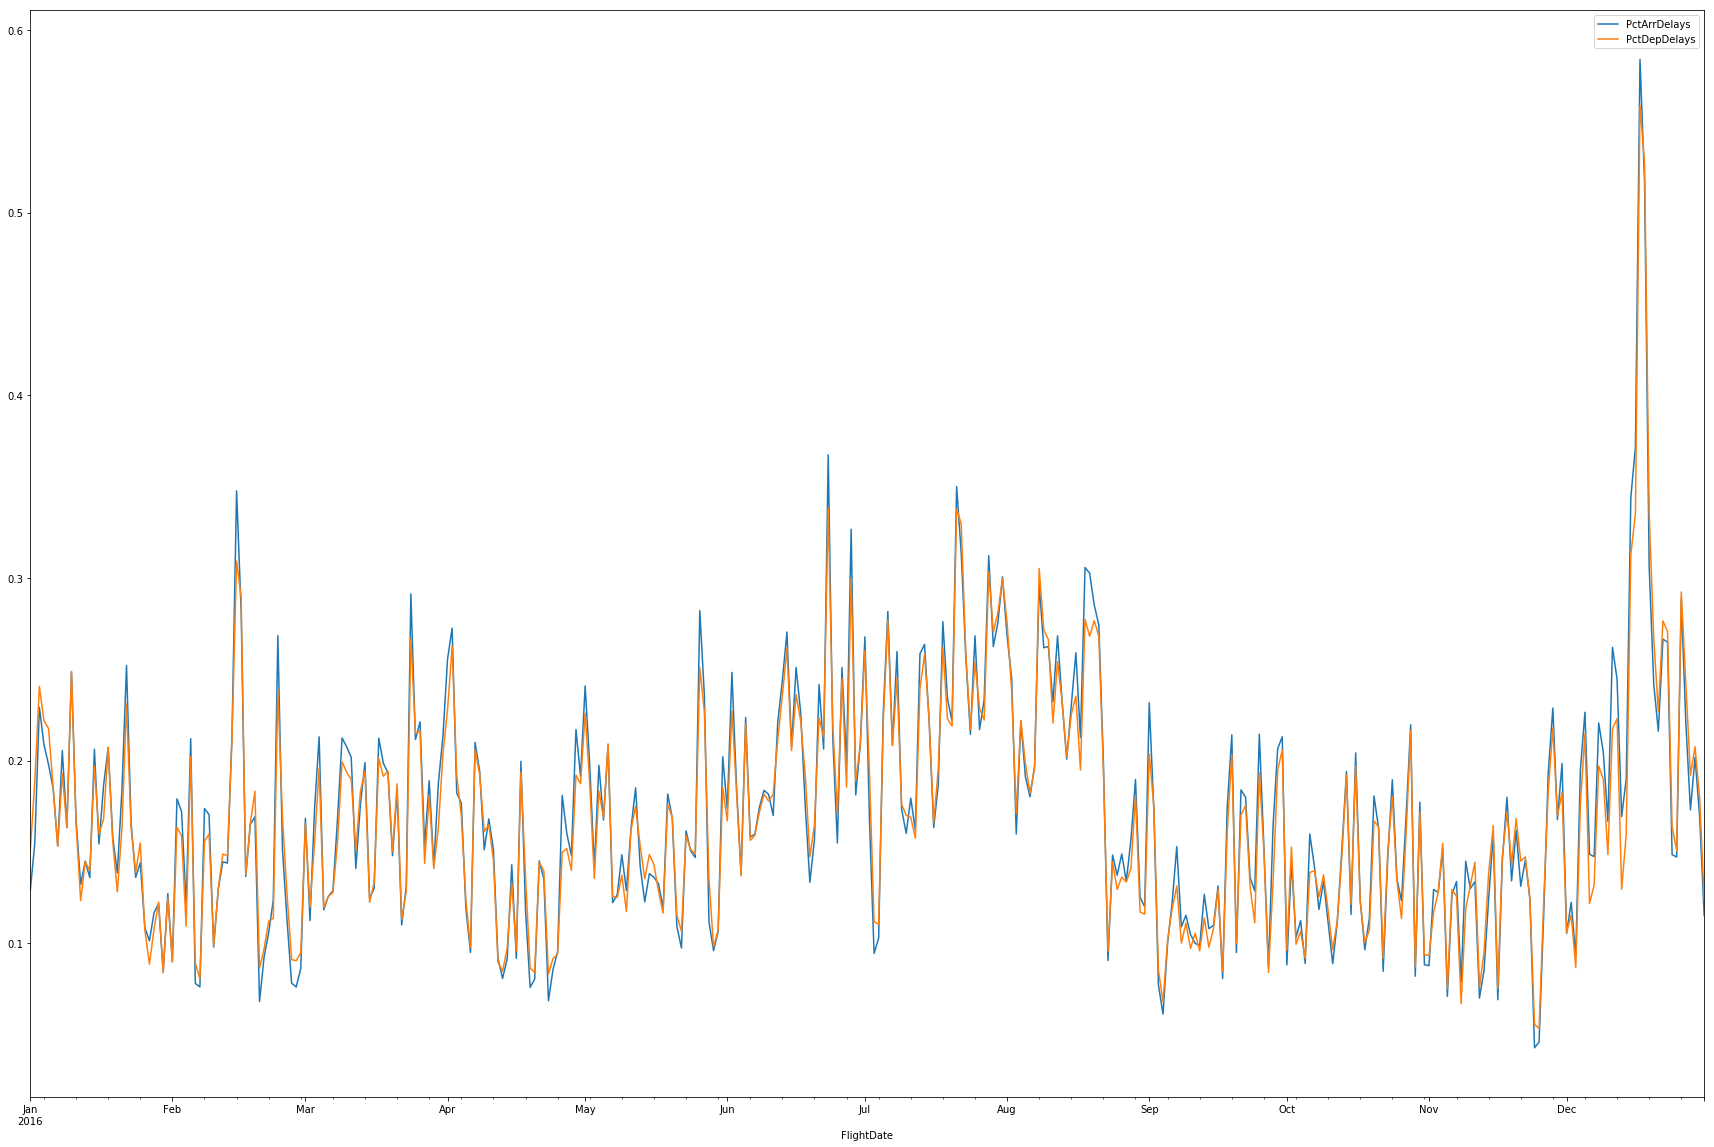

In [95]:
fig, ax1 = plt.subplots(1, 1, figsize=(30,20))
df_cur.plot('FlightDate', 'PctArrDelays', ax=ax1)
df_cur.plot('FlightDate', 'PctDepDelays', ax=ax1)
# df_cur.plot('FlightDate', 'isweekend', ax=ax1)

5

In [31]:
df[df['Carrier'] == 'DL'].sort_values(by=['Num_Flights'], ascending=False).head(50)

,FlightDate,Carrier,Origin,Obsv_Type,Obsv_Val_A,Obsv_Val_B,Lat,Long,Alt,Num_Flights,Num_ArrDelays,Num_DepDelays
25237587,2017-11-26,DL,ATL,TMIN,50.0,50,33.6367,-84.428101,1026.0,794,47.0,63.0
25237586,2017-11-26,DL,ATL,TMAX,172.0,172,33.6367,-84.428101,1026.0,794,47.0,63.0
25237581,2017-11-26,DL,ATL,AWND,47.0,47,33.6367,-84.428101,1026.0,794,47.0,63.0
25237583,2017-11-26,DL,ATL,SNOW,0.0,0,33.6367,-84.428101,1026.0,794,47.0,63.0
25237584,2017-11-26,DL,ATL,SNWD,0.0,0,33.6367,-84.428101,1026.0,794,47.0,63.0
25237585,2017-11-26,DL,ATL,TAVG,113.0,113,33.6367,-84.428101,1026.0,794,47.0,63.0
25237582,2017-11-26,DL,ATL,PRCP,0.0,0,33.6367,-84.428101,1026.0,794,47.0,63.0
25237588,2017-11-26,DL,ATL,WDF2,330.0,330,33.6367,-84.428101,1026.0,794,47.0,63.0
25237589,2017-11-26,DL,ATL,WDF5,320.0,320,33.6367,-84.428101,1026.0,794,47.0,63.0
25237590,2017-11-26,DL,ATL,WSF2,94.0,94,33.6367,-84.428101,1026.0,794,47.0,63.0
